In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import pandas as pd

In [2]:
with open('Q_oneside.pickle', 'rb') as fp:
    Q = pickle.load(fp)

In [3]:
sns.set_theme(style="whitegrid")

In [4]:
Q.shape

(10, 401, 2, 10)

In [5]:
# pQ = Q
pQ = Q[:, ::10, :, :]

In [6]:
n_ins, n_period, n_agents, n_act = pQ.shape

In [7]:
df = []
for ins in range(n_ins):
    for act in [0, 1, 2, 3, 4, 5, 9]:
        val = pQ[ins, :, :, act].mean(1)
        df.append(pd.DataFrame({'Q':val, 'instance': ins*np.ones(n_period), 
                                'Actions':[str((act+1)/10),]*n_period, 'step': np.arange(n_period)}))
Qdf = pd.concat(df)

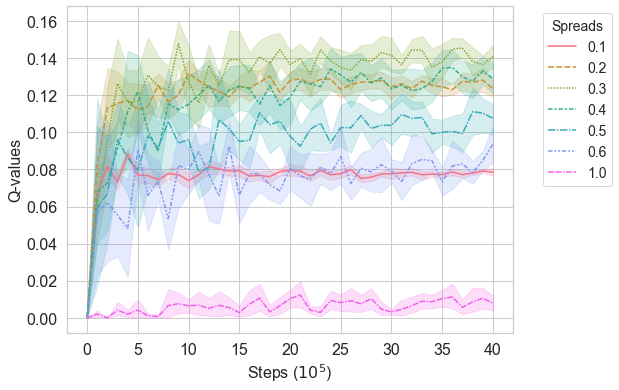

In [8]:
plt.figure(figsize=(8,6))
palette = sns.color_palette("husl", 7)
g = sns.lineplot(data=Qdf, x='step', y='Q', hue='Actions', palette=palette, ci=95, style='Actions')
plt.xlabel(r'Steps ($10^5$)', fontsize=16)
plt.ylabel('Q-values', fontsize=16)
g.tick_params(axis = 'both', which = 'major', labelsize = 16)
plt.legend(bbox_to_anchor=(1.05, 1), title='Spreads', fontsize=14, title_fontsize=14)
# plt.show()
plt.savefig('Q_oneside.pdf', format='pdf', dpi=1000, bbox_inches='tight', pad_inches=0.1)